## The Programming Historian 
# Introduction to stylometry with Python

#### This jupyter notebook is based on François Dominic Laramée, "Introduction to stylometry with Python," The Programming Historian 7 (2018), https://doi.org/10.46430/phen0078.

In [4]:
import os
import nltk
import math
%matplotlib inline

## Prepare files

In [5]:
# make the Vasari files
list_of_files = os.listdir('./data/results/Dante')
#list_of_files

In [6]:
# build lists of filenames per author to the corpus

Vasari = list()
Bartoli = list()
Borghini = list()
Vcopy = list()
Giambullari = list()
unkown = list()


for i in list_of_files:
    if i.startswith('Bartoli'):
        Bartoli.append(i)
    
    if i.startswith('Borghini'):
        Borghini.append(i)
        
    if i.startswith('Giambullari'):
        Giambullari.append(i)
        
    if i.startswith('Vasari'):
        Vasari.append(i)
        
    if i.startswith('Vcopy'):
        Vcopy.append(i)
        
    if i.startswith('unkown'):
        unkown.append(i)
len(Giambullari)

6

In [7]:
# build dictionary with the whole corpus

Vpapers = {
    'Bartoli': Bartoli, 
    'Borghini': Borghini, 
    'Giambullari': Giambullari,
    'Vasari': Vasari, 
    'Vcopy': Vcopy,
    'unkown': unkown
}

#Vpapers

### function to read Vasari files

In [8]:
# A function that compiles all of the text files associated with a single author 
# into a single string

def read_files_into_stringV(filenames):
    strings = []
    for filename in filenames:
        with open('data/results/Dante/' + filename) as f:
            strings.append(f.read())
    return '\n'.join(strings)

In [9]:
# Make a dictionary out of the authors' corpora
authorsV = list(Vpapers.keys())
files_by_author = {}

for author in authorsV:
    files_by_author[author] = read_files_into_stringV(eval(author))

In [10]:
for author in authorsV:
    print(files_by_author[author][:100])

Molto Magnifico Signor Cavaliere. Tanto quanto io mi rallegro, che voi con l’aver finita la gran sal
Magnifico messer Giorgio. Come io son giunto in villa, la prima cosa io ho pensato un poco allo scri
Messer Giorgio mio caro. De’ tanti disagi e fastidii, che per me avete patiti, una sola satisfazzion
Molto Magnifico Messer Giovanni, Signor mio. Essi riceuto le 101 lastre ben condizionate, ecetto che
Illustrissimo e Eccellentissimo Signor mio. Io mi son tanto rallegrato della riforma, fatta a l’oper
Pesello e Francesco Peselli
Rare volte suole avvenire che i discepoli de’ maestri rari, se osservano


# First Stylometric Test: Mendenhall’s Characteristic Curves of Composition

## Vasari version

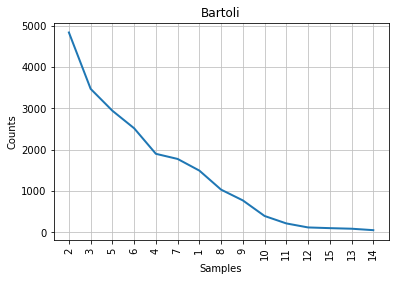

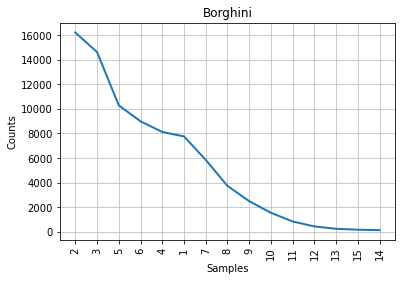

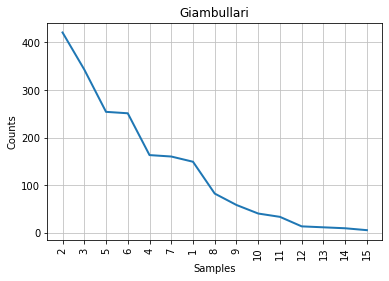

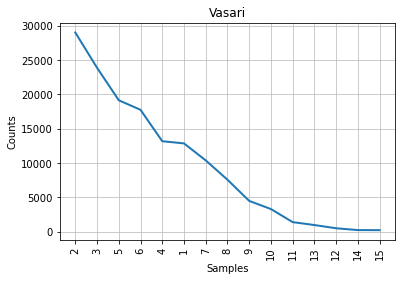

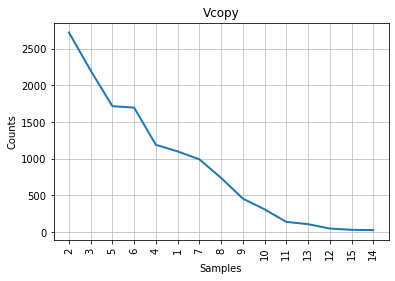

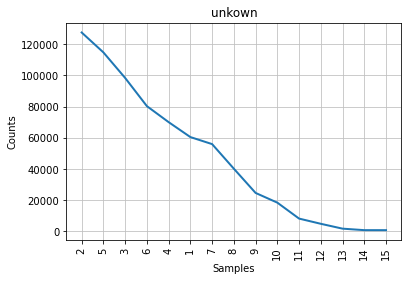

In [11]:
# Compare the disputed papers to those written by everyone,
# including the shared ones.

# Transform the authors' corpora into lists of word tokens
lives_by_author_tokens = {}
lives_by_author_length_distributions = {}
for author in authorsV:
    tokens = nltk.word_tokenize(files_by_author[author], language = 'italian')

    # Filter out punctuation
    lives_by_author_tokens[author] = ([token for token in tokens
                                            if any(c.isalpha() for c in token)])

    # Get a distribution of token lengths
    token_lengths = [len(token) for token in lives_by_author_tokens[author]]
    lives_by_author_length_distributions[author] = nltk.FreqDist(token_lengths)
    lives_by_author_length_distributions[author].plot(15,title=author)

# Second Stylometric Test: Kilgariff’s Chi-Squared Method

## Vasari version

In [12]:
authorsV

['Bartoli', 'Borghini', 'Giambullari', 'Vasari', 'Vcopy', 'unkown']

In [13]:
# Who are the authors we are analyzing?
authors = ("Vasari", "Borghini", "Giambullari", "Vcopy", "Bartoli")

# Lowercase the tokens so that the same word, capitalized or not,
# counts as one word
for author in authors:
    lives_by_author_tokens[author] = (
        [token.lower() for token in lives_by_author_tokens[author]])
lives_by_author_tokens["unkown"] = (
    [token.lower() for token in lives_by_author_tokens["unkown"]])

# Calculate chisquared for each of the two candidate authors
for author in authors:

    # First, build a joint corpus and identify the 500 most frequent words in it
    joint_corpus = (lives_by_author_tokens[author] +
                    lives_by_author_tokens["unkown"])
    joint_freq_dist = nltk.FreqDist(joint_corpus)
    most_common = list(joint_freq_dist.most_common(700))

    # What proportion of the joint corpus is made up
    # of the candidate author's tokens?
    author_share = (len(lives_by_author_tokens[author])
                    / len(joint_corpus))

    # Now, let's look at the 500 most common words in the candidate
    # author's corpus and compare the number of times they can be observed
    # to what would be expected if the author's papers
    # and the Disputed papers were both random samples from the same distribution.
    chisquared = 0
    for word,joint_count in most_common:

        # How often do we really see this common word?
        author_count = lives_by_author_tokens[author].count(word)
        disputed_count = lives_by_author_tokens["unkown"].count(word)

        # How often should we see it?
        expected_author_count = joint_count * author_share
        expected_disputed_count = joint_count * (1-author_share)

        # Add the word's contribution to the chi-squared statistic
        chisquared += ((author_count-expected_author_count) *
                       (author_count-expected_author_count) /
                       expected_author_count)

        chisquared += ((disputed_count-expected_disputed_count) *
                       (disputed_count-expected_disputed_count)
                       / expected_disputed_count)

    print("The Chi-squared statistic for candidate", author, "is", round(chisquared,3))

The Chi-squared statistic for candidate Vasari is 84265.326
The Chi-squared statistic for candidate Borghini is 64834.969
The Chi-squared statistic for candidate Giambullari is 3037.064
The Chi-squared statistic for candidate Vcopy is 23354.609
The Chi-squared statistic for candidate Bartoli is 29068.342


## The Chi-squared results different in number of common words
### joint_freq_dist = nltk.FreqDist(joint_corpus)
    

## most_common = list(joint_freq_dist.most_common(700)

- The Chi-squared statistic for candidate Vasari is 84265.326
- The Chi-squared statistic for candidate Borghini is 64834.969
- The Chi-squared statistic for candidate Giambullari is 3037.064
- The Chi-squared statistic for candidate Vcopy is 23354.609
- The Chi-squared statistic for candidate Bartoli is 29068.342



## most_common = list(joint_freq_dist.most_common(500)

- The Chi-squared statistic for candidate Vasari is 74044.9
- The Chi-squared statistic for candidate Borghini is 54457.2
- The Chi-squared statistic for candidate Giambullari is 2450.3
- The Chi-squared statistic for candidate Vcopy is 19427.1
- The Chi-squared statistic for candidate Bartoli is 23755.9

## most_common = list(joint_freq_dist.most_common(300)

- The Chi-squared statistic for candidate Vasari is 61539.958
- The Chi-squared statistic for candidate Borghini is 43269.587
- The Chi-squared statistic for candidate Giambullari is 1839.374
- The Chi-squared statistic for candidate Vcopy is 7896.447
- The Chi-squared statistic for candidate Bartoli is 12885.447

# Third Stylometric Test: John Burrows’ Delta Method

## Vasari version

In [14]:
authorsV

['Bartoli', 'Borghini', 'Giambullari', 'Vasari', 'Vcopy', 'unkown']

In [15]:
# Feature Selection

# Who are we dealing with this time?
authors = ('Bartoli', 'Borghini', 'Giambullari', 'Vasari', 'Vcopy')

# Convert papers to lowercase to count all tokens of the same word together
# regardless of case
for author in authors:
    lives_by_author_tokens[author] = (
        [tok.lower() for tok in lives_by_author_tokens[author]])

# Combine every paper except our test case into a single corpus
whole_corpus = []
for author in authors:
    whole_corpus += lives_by_author_tokens[author]

# Get a frequency distribution
whole_corpus_freq_dist = list(nltk.FreqDist(whole_corpus).most_common(X)) # ! # X VARIABLE here! <--------- !
whole_corpus_freq_dist[ :10 ]

[('che', 12468),
 ('e', 9651),
 ('di', 8122),
 ('a', 5428),
 ('non', 4553),
 ('et', 4087),
 ('la', 4058),
 ('per', 3770),
 ('il', 3570),
 ('in', 3050)]

In [16]:
# Calculating features for each subcorpus

# The main data structure
features = [word for word,freq in whole_corpus_freq_dist]
feature_freqs = {}

for author in authors:
    # A dictionary for each candidate's features
    feature_freqs[author] = {}

    # A helper value containing the number of tokens in the author's subcorpus
    overall = len(lives_by_author_tokens[author])

    # Calculate each feature's presence in the subcorpus
    for feature in features:
        presence = lives_by_author_tokens[author].count(feature)
        feature_freqs[author][feature] = presence / overall

In [17]:
# Calculating feature averages and standard deviations

# The data structure into which we will be storing the "corpus standard" statistics
corpus_features = {}

# For each feature...
for feature in features:
    # Create a sub-dictionary that will contain the feature's mean
    # and standard deviation
    corpus_features[feature] = {}

    # Calculate the mean of the frequencies expressed in the subcorpora
    feature_average = 0
    for author in authors:
        feature_average += feature_freqs[author][feature]
    feature_average /= len(authors)
    corpus_features[feature]["Mean"] = feature_average

    # Calculate the standard deviation using the basic formula for a sample
    feature_stdev = 0
    for author in authors:
        diff = feature_freqs[author][feature] - corpus_features[feature]["Mean"]
        feature_stdev += diff*diff
    feature_stdev /= (len(authors) - 1)
    feature_stdev = math.sqrt(feature_stdev)
    corpus_features[feature]["StdDev"] = feature_stdev

In [18]:
# Calculating z-scores

feature_zscores = {}
for author in authors:
    feature_zscores[author] = {}
    for feature in features:

        # Z-score definition = (value - mean) / stddev
        # We use intermediate variables to make the code easier to read
        feature_val = feature_freqs[author][feature]
        feature_mean = corpus_features[feature]["Mean"]
        feature_stdev = corpus_features[feature]["StdDev"]
        feature_zscores[author][feature] = ((feature_val-feature_mean) /
                                            feature_stdev)

In [19]:
# Calculating features and z-scores for the "unkown" = disputed biographies

# Tokenize the test case
testcase_tokens = nltk.word_tokenize(files_by_author["unkown"], language = 'italian')

# Filter out punctuation and lowercase the tokens
testcase_tokens = [token.lower() for token in testcase_tokens
                   if any(c.isalpha() for c in token)]

# Calculate the test case's features
overall = len(testcase_tokens)
testcase_freqs = {}
for feature in features:
    presence = testcase_tokens.count(feature)
    testcase_freqs[feature] = presence / overall

# Calculate the test case's feature z-scores
testcase_zscores = {}
for feature in features:
    feature_val = testcase_freqs[feature]
    feature_mean = corpus_features[feature]["Mean"]
    feature_stdev = corpus_features[feature]["StdDev"]
    testcase_zscores[feature] = (feature_val - feature_mean) / feature_stdev
    print("Test case z-score for feature", feature, "is", testcase_zscores[feature])

Test case z-score for feature che is -5.281407843070917
Test case z-score for feature e is 0.3311885573290748
Test case z-score for feature di is 1.491891904435234
Test case z-score for feature a is -1.717053114812605
Test case z-score for feature non is -1.3023892080578598
Test case z-score for feature et is -0.5767917862105967
Test case z-score for feature la is -0.5405370961942899
Test case z-score for feature per is -0.9089882034797925
Test case z-score for feature il is 0.7566063913064
Test case z-score for feature in is 4.371861439948174
Test case z-score for feature io is -5.523645743794887
Test case z-score for feature l is 0.4417030981054031
Test case z-score for feature si is 1.3778726570779936
Test case z-score for feature è is 0.08823631703937723
Test case z-score for feature mi is -5.994925341183742
Test case z-score for feature le is -0.25952141950805957
Test case z-score for feature con is 1.9201846461305425
Test case z-score for feature vostra is -1.9500097599354524
Tes

Test case z-score for feature corpo is 0.12758966922226345
Test case z-score for feature venuto is -0.7330690351797804
Test case z-score for feature simile is 0.3761155225758948
Test case z-score for feature prego is -1.0892048417883908
Test case z-score for feature sendo is -0.8757756452950058
Test case z-score for feature solito is -0.9947458523139818
Test case z-score for feature core is -0.8413776939223789
Test case z-score for feature amor is -1.2579464514035883
Test case z-score for feature vede is 3.951537580260029
Test case z-score for feature nostri is 0.15985029759762973
Test case z-score for feature nostra is 7.732212773588395
Test case z-score for feature aviso is -1.1317225960365902
Test case z-score for feature monsignor is -0.712856813910497
Test case z-score for feature dare is 0.045127674608207366
Test case z-score for feature man is 1.3166495680018901
Test case z-score for feature fabrica is 0.4128322117372007
Test case z-score for feature ornamento is 1.4908132660798

Test case z-score for feature tornare is -0.12494281957688023
Test case z-score for feature popolo is 1.338881906035898
Test case z-score for feature simil is -0.4389564931953142
Test case z-score for feature vescovo is 2.7093985201245903
Test case z-score for feature condotto is 2.6055662977973655
Test case z-score for feature contenta is -0.895186903269978
Test case z-score for feature bascio is -0.7285181048596006
Test case z-score for feature avisate is -0.9115236903616672
Test case z-score for feature pieno is 0.9201072609394999
Test case z-score for feature pace is 0.15203196796461774
Test case z-score for feature metterei is -0.7602210304617988
Test case z-score for feature pietra is 1.6845463081412293
Test case z-score for feature volessi is -0.7251775927110194
Test case z-score for feature mandare is -0.6494588478931903
Test case z-score for feature starò is -1.6738714528680945
Test case z-score for feature faccino is -1.2750846418362567
Test case z-score for feature impresa i

Test case z-score for feature venendo is 1.104897176402124
Test case z-score for feature darò is -1.3265886571006273
Test case z-score for feature giugno is -0.6066075789252928
Test case z-score for feature molta is 2.2239170365037664
Test case z-score for feature comodo is -0.5920451548305087
Test case z-score for feature freddo is -1.1950184568518591
Test case z-score for feature principale is 3.852400912994213
Test case z-score for feature sagrestia is 2.6939711941187148
Test case z-score for feature qualità is 0.1681165418114416
Test case z-score for feature volere is 0.19026915230963817
Test case z-score for feature adosso is -0.8552718644530045
Test case z-score for feature errore is 0.04108503180204641
Test case z-score for feature aranno is -0.64657594389649
Test case z-score for feature faccende is -0.7785030197943659
Test case z-score for feature vite is 0.1638990537179429
Test case z-score for feature parti is 0.8924611128766174
Test case z-score for feature xx is -0.8101951

Test case z-score for feature pregare is -1.0480148744789548
Test case z-score for feature martello is -0.43785319650801297
Test case z-score for feature prometto is -0.7750000777424274
Test case z-score for feature affezione is -0.6257739511466289
Test case z-score for feature uscito is -0.43091126449496514
Test case z-score for feature mostri is 0.2794083642734661
Test case z-score for feature marco is 7.900339473561483
Test case z-score for feature cara is -0.6888704554631991
Test case z-score for feature sperare is -0.21669893190589884
Test case z-score for feature savio is -0.5296053089365154
Test case z-score for feature torto is -0.5545021828438388
Test case z-score for feature beatitudine is -1.0941100602316067
Test case z-score for feature pensi is -0.5296053089365154
Test case z-score for feature dogana is -0.7062019297648087
Test case z-score for feature passo is -0.49306764986773394
Test case z-score for feature ammannato is -0.42365412267469255
Test case z-score for featur

Test case z-score for feature mutare is -0.0927547278066426
Test case z-score for feature finirà is -0.5853078955784458
Test case z-score for feature risponda is -0.9927244863264327
Test case z-score for feature avventura is 0.021915700098380866
Test case z-score for feature b is -0.690110307312645
Test case z-score for feature sadisfazione is -0.4472135954999579
Test case z-score for feature meriti is 0.3090839956042661
Test case z-score for feature memoriale is -0.8412307815413986
Test case z-score for feature dicendogli is -0.2805396027513144
Test case z-score for feature cerca is -0.12516026977292743
Test case z-score for feature iustizia is -0.21483814388719727
Test case z-score for feature sapevo is -0.6615171941068065
Test case z-score for feature ragionar is -0.6033228514299389
Test case z-score for feature busino is -0.7072497975110615
Test case z-score for feature eglino is 1.119717463139831
Test case z-score for feature medesimi is 6.534693667394992
Test case z-score for fea

Test case z-score for feature miniato is 2.0436503200210026
Test case z-score for feature pauolo is -0.5644316801237153
Test case z-score for feature avevon is -0.030960361912295696
Test case z-score for feature ditegli is -0.5644316801237153
Test case z-score for feature genaio is -0.4458824982989553
Test case z-score for feature partite is -0.7306992708301443
Test case z-score for feature alquanto is -0.13161652875880475
Test case z-score for feature finilla is -0.4472135954999579
Test case z-score for feature fan is -0.5603808905105532
Test case z-score for feature mdlvi is -0.5881572944606736
Test case z-score for feature caricare is -0.2941056441757504
Test case z-score for feature disegniare is -0.4472135954999579
Test case z-score for feature conpassione is -0.4472135954999579
Test case z-score for feature acomodare is -0.7173641493990454
Test case z-score for feature picttura is -0.4472135954999579
Test case z-score for feature piaque is -0.7173641493990454
Test case z-score fo

Test case z-score for feature salamone is 0.24671533567439896
Test case z-score for feature dorme is -0.015876959382935582
Test case z-score for feature prestezza is -0.1514432923190863
Test case z-score for feature larghi is -0.274280850912746
Test case z-score for feature minima is -0.2568556846950383
Test case z-score for feature nuovi is 1.4138199198324242
Test case z-score for feature bisognassi is -0.45481573940046255
Test case z-score for feature lodo is -0.5601571208000958
Test case z-score for feature aspettando is 0.009585717720287724
Test case z-score for feature pigliassi is -0.760467144587413
Test case z-score for feature te is 0.940065430080619
Test case z-score for feature cino is -0.4496278459491927
Test case z-score for feature venuti is 0.940065430080619
Test case z-score for feature doverrebbe is -0.44721359549995787
Test case z-score for feature conoscete is -0.6464336589503986
Test case z-score for feature visita is -0.4541821676084767
Test case z-score for feature

Test case z-score for feature armario is 0.22621910695895828
Test case z-score for feature grazioso is 1.765418546248699
Test case z-score for feature rimetta is -0.7282474726537846
Test case z-score for feature favorito is 2.041872763230516
Test case z-score for feature scrittura is 0.019003397676449325
Test case z-score for feature discosto is -0.324960595742031
Test case z-score for feature mosse is 0.15890634683368118
Test case z-score for feature prigione is 0.89152519586652
Test case z-score for feature potrebbesi is -0.5086570667788688
Test case z-score for feature fantasie is 3.6036682590589812
Test case z-score for feature strano is 0.8736041396209897
Test case z-score for feature seben is -0.7868204910852055
Test case z-score for feature ricordovi is -0.447213595499958
Test case z-score for feature tommaso is 8.373576159537489
Test case z-score for feature stile is 0.6568126452883655
Test case z-score for feature avvertite is -0.447213595499958
Test case z-score for feature p

Test case z-score for feature povera is 1.4333628201174227
Test case z-score for feature tribolo is 17.133714757000515
Test case z-score for feature brevità is 0.8571050402927236
Test case z-score for feature idio is -0.6502392429876043
Test case z-score for feature mantenga is -0.5415657053555367
Test case z-score for feature desiderano is -0.6962126450070784
Test case z-score for feature pictori is -0.38496099131072253
Test case z-score for feature ringraziare is -0.6871800171044267
Test case z-score for feature risolvetevi is -0.6296681209519109
Test case z-score for feature puo is -0.6296681209519109
Test case z-score for feature allegramente is -0.32842542885128584
Test case z-score for feature serenissime is -0.6962126450070784
Test case z-score for feature chiedere is 0.25135603501183135
Test case z-score for feature caduto is -0.18919248292087157
Test case z-score for feature staio is -0.5415657053555367
Test case z-score for feature potrebbono is 0.22364129720566656
Test case 

Test case z-score for feature meza is -0.4472135954999579
Test case z-score for feature audacia is -0.41290246252914564
Test case z-score for feature impeto is -0.4054329498577143
Test case z-score for feature rami is -0.03527458047321438
Test case z-score for feature sacerdoti is -0.38538581798968674
Test case z-score for feature dimostrare is -0.17272453173345995
Test case z-score for feature facevanli is -0.4472135954999579
Test case z-score for feature poterne is -0.5280418409514411
Test case z-score for feature tirato is 4.621608370117204
Test case z-score for feature ozio is -0.2397095076585725
Test case z-score for feature difesa is 0.06015726826849135
Test case z-score for feature rame is 1.3990891008917228
Test case z-score for feature primieramente is 0.10639778498333427
Test case z-score for feature pastori is 1.3588091752635525
Test case z-score for feature staremo is -0.5846406559019546
Test case z-score for feature denti is -0.02658517191495656
Test case z-score for featu

Test case z-score for feature milizia is -0.060181926631328445
Test case z-score for feature comandare is -0.5559598412455664
Test case z-score for feature damigelle is -0.6936262403899118
Test case z-score for feature attenda is -0.3955582621174567
Test case z-score for feature disagi is -0.3745755116368876
Test case z-score for feature dolgo is -0.5442419023680821
Test case z-score for feature rispondo is -0.4637344711177966
Test case z-score for feature silenzio is -0.35547002031955005
Test case z-score for feature intaglio is -0.24284887518445306
Test case z-score for feature ragionerò is -0.4573659740120174
Test case z-score for feature godervi is -0.47010296822357583
Test case z-score for feature alloghi is -0.5902384049015473
Test case z-score for feature sedici is 2.9977153092947124
Test case z-score for feature doverranno is -0.5462254794688337
Test case z-score for feature gravare is -0.5902384049015473
Test case z-score for feature bernardino is 7.361291922034627
Test case z

Test case z-score for feature essequie is 1.7537584120389043
Test case z-score for feature tornarmene is -0.40716170070651053
Test case z-score for feature avesti is -0.6793503672649065
Test case z-score for feature eroi is -0.6359001757146596
Test case z-score for feature fili is -0.5195195465442761
Test case z-score for feature dicevi is -0.6803690161429241
Test case z-score for feature cervelli is -0.3391145340669115
Test case z-score for feature guadagni is -0.17461603610696255
Test case z-score for feature disegnando is 2.042536298319053
Test case z-score for feature partirsi is 3.0815845970184252
Test case z-score for feature attenenti is -0.3489635320383846
Test case z-score for feature doppia is 0.13100679325101866
Test case z-score for feature adoperate is -0.5432560339857085
Test case z-score for feature desideroso is 0.7210982909920679
Test case z-score for feature bona is -0.4843391707503214
Test case z-score for feature mostrarli is -0.6803690161429241
Test case z-score fo

In [20]:
# Calculate Delta

for author in authors:
    delta = 0
    for feature in features:
        delta += math.fabs((testcase_zscores[feature] -
                            feature_zscores[author][feature]))
    delta /= len(features)
    print( "- Delta score for candidate", author, "is", delta )
    
print('\nthe nltk.FreqDist(whole_corpus).most_common(X) value was: ', X, '; tokenizer: language = \'italian\'')

- Delta score for candidate Bartoli is 1.4238902538551055
- Delta score for candidate Borghini is 1.3356429499408466
- Delta score for candidate Giambullari is 1.3484106260054398
- Delta score for candidate Vasari is 1.291135589191854
- Delta score for candidate Vcopy is 1.515776438240675

the nltk.FreqDist(whole_corpus).most_common(X) value was:  5000 ; tokenizer: language = 'italian'


for comparing the results, here the original table from the Programming Historian with .most_common(30):
conclusion was: Jay is the author

- Delta score for candidate Hamilton is 1.768470453004334
- Delta score for candidate Madison is 1.6089724119682816
- Delta score for candidate Jay is 1.5345768956569326
- Delta score for candidate Disputed is 1.5371768107570636
- Delta score for candidate Shared is 1.846113566619675

In [1]:
#X-Variable: size of .most_common(X)

X = 5000

# results 
## Get a frequency distribution
whole_corpus_freq_dist = list(nltk.FreqDist(whole_corpus).most_common(40))

### .most_common(20)

- Delta score for candidate Bartoli is 1.838567213310585
- Delta score for candidate Borghini is 2.212588708509892
- Delta score for candidate Giambullari is 2.3887643490055224
- Delta score for candidate Vasari is 1.8931766640767909
- Delta score for candidate Vcopy is 2.1447275267148367


### .most_common(25)

- Delta score for candidate Bartoli is 1.862439585375948
- Delta score for candidate Borghini is 2.2053972570738667
- Delta score for candidate Giambullari is 2.4014207959785647
- Delta score for candidate Vasari is 1.9841225195767223
- Delta score for candidate Vcopy is 2.226729360743451

# .most_common(30)


- Delta score for candidate Bartoli is 1.7577384136205014
- Delta score for candidate Borghini is 2.1217816333863158
- Delta score for candidate Giambullari is 2.135014328655037
- Delta score for candidate Vasari is 1.9317139647440427
- Delta score for candidate Vcopy is 2.160444595368845


- Delta score for candidate Bartoli is 1.7577106697854776
- Delta score for candidate Borghini is 2.1216984237448617
- Delta score for candidate Giambullari is 2.134965208752774
- Delta score for candidate Vasari is 1.931615052520559
- Delta score for candidate Vcopy is 2.16038276179463

the nltk.FreqDist(whole_corpus).most_common(X) value was:  30 ; tokenizer: language = 'italian'



### .most_common(40)

- Delta score for candidate Bartoli is 1.5905160467937012
- Delta score for candidate Borghini is 1.9350455324941702
- Delta score for candidate Giambullari is 2.076301702793525
- Delta score for candidate Vasari is 1.6893137604038295
- Delta score for candidate Vcopy is 1.8748150015597838




### .most_common(50)

- Delta score for candidate Bartoli is 1.4523928184962533
- Delta score for candidate Borghini is 1.8047511042785178
- Delta score for candidate Giambullari is 2.089697790842044
- Delta score for candidate Vasari is 1.591271219282905
- Delta score for candidate Vcopy is 1.7585336358282706

### .most_common(100)
- Delta score for candidate Bartoli is 1.6547129258282405
- Delta score for candidate Borghini is 1.7310287339170731
- Delta score for candidate Giambullari is 2.061855363803096
- Delta score for candidate Vasari is 1.5978447600399246
- Delta score for candidate Vcopy is 1.7595221289137672


### .most_common(200)

- Delta score for candidate Bartoli is 1.8559837207812162
- Delta score for candidate Borghini is 1.9069649266433921
- Delta score for candidate Giambullari is 2.1526371263687722
- Delta score for candidate Vasari is 1.8195480012687923
- Delta score for candidate Vcopy is 1.9867602944880658


### .most_common(500)

- Delta score for candidate Bartoli is 1.6692189153794925
- Delta score for candidate Borghini is 1.6751827120540324
- Delta score for candidate Giambullari is 1.9896435201968878
- Delta score for candidate Vasari is 1.5844653842381329
- Delta score for candidate Vcopy is 1.7378617376750174


### .most_common(1000)

- Delta score for candidate Bartoli is 1.5618879881936707
- Delta score for candidate Borghini is 1.5417704547933078
- Delta score for candidate Giambullari is 1.8271514340620907
- Delta score for candidate Vasari is 1.5381364226425025
- Delta score for candidate Vcopy is 1.7034986356287418


- Delta score for candidate Bartoli is 1.561114152322625
- Delta score for candidate Borghini is 1.5408040808889625
- Delta score for candidate Giambullari is 1.8263234008450473
- Delta score for candidate Vasari is 1.5367722383052635
- Delta score for candidate Vcopy is 1.702135563650981

the nltk.FreqDist(whole_corpus).most_common(X) value was:  1000



### .most_common(2000)

- Delta score for candidate Bartoli is 1.447382305617218
- Delta score for candidate Borghini is 1.3904418615732568
- Delta score for candidate Giambullari is 1.6272694350761017
- Delta score for candidate Vasari is 1.3756849118429249
- Delta score for candidate Vcopy is 1.6250483882999922

the nltk.FreqDist(whole_corpus).most_common(X) value was:  2000 ; tokenizer: language = 'italian'


### .most_common(5000)

- Delta score for candidate Bartoli is 1.4238902538551055
- Delta score for candidate Borghini is 1.3356429499408466
- Delta score for candidate Giambullari is 1.3484106260054398
- Delta score for candidate Vasari is 1.291135589191854
- Delta score for candidate Vcopy is 1.515776438240675

the nltk.FreqDist(whole_corpus).most_common(X) value was:  5000 ; tokenizer: language = 'italian'


# Observation

the bigger the set of .most common words, the closer Vasari himself to the biographies